In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import warnings
from pprint import pprint

from sklearn import model_selection
import numpy as np

In [2]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

def log_loss(pred, y):
    return -np.sum(y*np.log(pred)+(1-y)*np.log(1-pred))/len(y)

In [14]:
def adaboost(X, y, N):

    # Размер выборки
    n_objects = len(X)

    # Запишем количество классов в переменную
    n_classes = len(np.unique((y)))

    # Начальные веса деревьев
    w = np.ones(n_objects) / n_objects

    # Деревья с весами будем записывать в список
    models = []

    for n in range(N):
        # Зададим дерево и обучим его
        clf = LogisticRegression()
      
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            #и здесь обучаем модели
            clf.fit(X, y, w)
    
            predictions = clf.predict_proba(X)[:, 1]
            e = log_loss(predictions, y)
            # отбросим дерево, если его ошибка больше 0.5
            # Запишем условие в общем виде (применимо к небинарным классификаторам)
            if e >= 1 - 1/n_classes: 
                break
    
            # Вычислим вес для дерева
            alpha = 0.5 * np.log((1 - e) / e)
    
            # Найдем индексы правильно классифицированных элементов
            match = (predictions > 0.5).astype(int) == y
    
            # Увеличим веса для неправильно классифицированных элементов
            w[~match] *= np.exp(alpha)
    
            # Нормализуем веса
            w /= w.sum()
    
            # Добавим дерево с весом в список
            models.append((alpha, clf))
    
    return models

In [29]:
N = 50
models = adaboost(X_train, y_train, N)
pprint(models)

[(0.7547914838032729, LogisticRegression()),
 (0.7323830658872629, LogisticRegression()),
 (0.634677859392356, LogisticRegression()),
 (0.5220876144648005, LogisticRegression()),
 (0.3796841567991661, LogisticRegression()),
 (0.2847057034473693, LogisticRegression()),
 (0.20627649122677189, LogisticRegression()),
 (0.16144283315795765, LogisticRegression()),
 (0.11865470261491114, LogisticRegression()),
 (0.061980655739168285, LogisticRegression()),
 (0.0661387643080885, LogisticRegression()),
 (0.05235081837254667, LogisticRegression()),
 (0.03347187891279153, LogisticRegression()),
 (0.022075199336590277, LogisticRegression()),
 (0.03126631934341958, LogisticRegression()),
 (0.0003172183415144946, LogisticRegression()),
 (0.013691964620029537, LogisticRegression())]


In [17]:
def predict_proba(X):
    return 1/(np.exp(-X))

In [25]:
def predict(X, models):
    
    n_classes = 2
    n_objects = len(X)
    
    # вначале обозначим предсказание нулевым массивом
    y_pred = np.zeros((n_objects, n_classes))
    
    for alpha, clf in models:
        prediction = clf.predict(X)
        
        # Для каждого предсказания будем прибавлять alpha к
        # элементу с индексом предсказанного класса
        y_pred[range(n_objects), prediction] += alpha
    
    # выберем индексы с максимальными суммарными весами -
    # получим предсказанные алгоритмом классы
    y_pred = np.argmax(y_pred, axis=1)
    
    return y_pred
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    print(f'Точность алгоритма на обучающей выборке: {(1 - log_loss(predict(X_train, models), y_train)) * 100:.3f}')

Точность алгоритма на обучающей выборке: nan


In [19]:
predict(X_train, models)

array([1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,

In [22]:
print(f'Точность алгоритма на тестовой выборке: {(1 - log_loss(predict(X_test, models), y_test)) * 100:.3f}')

Точность алгоритма на тестовой выборке: nan


<ipython-input-2-579fb2ea421e>:4: RuntimeWarning: divide by zero encountered in log
  return -np.sum(y*np.log(pred)+(1-y)*np.log(1-pred))/len(y)
<ipython-input-2-579fb2ea421e>:4: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(y*np.log(pred)+(1-y)*np.log(1-pred))/len(y)


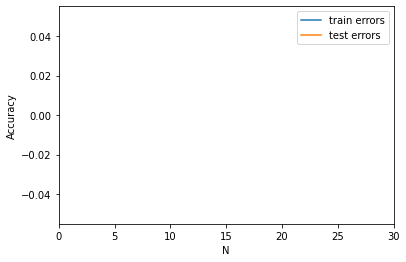

In [21]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    #и здесь обучаем модели

    train_errors = []
    test_errors = []
    
    for n in range(1, 31):
        mods = adaboost(X_train, y_train, n)
        train_errors.append(log_loss(predict(X_train, mods), y_train))
        test_errors.append(log_loss(predict(X_test, mods), y_test))
    x = list(range(1, 31))
    
    plt.xlim(0, 30)
    plt.plot(x, train_errors, label='train errors')
    plt.plot(x, test_errors, label='test errors')
    plt.xlabel('N')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper right')

<b>Домашнее задание:</b> Реализовать адаптивный бустинг использующий Логистическую Регрессию и меру ошибок LogLoss. Сравнить с точностью адаптивного бустинга на деревьях решений. Для сбора предсказаний можно использовать ту же функцию predict что и для бустинга на деревьях<br>
<i>Примечания: в LogLoss необходимо передавать не предсказания полученные с помощью clf.predict(...), а вероятность, полученную с помощью clf.predict_proba(...)[:, 1]  

In [40]:
#Рекоммендуемая реализация LogLoss
def log_loss(pred, y): return -np.sum(y*np.log(pred)+(1-y)*np.log(1-pred))/len(y)

In [41]:
#Для подавления предупреждений о недостаточной сходимости можно использовать:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    #и здесь обучаем модели

<b>Домашнее задание(необязательное, повышенной сложности):</b> Реализовать специальную функцию predict для бустинга на логистической регрессии выводящую предсказания по формуле: $ Predictions=sign(Score_{bust}) $,
где sign равен единице для положительных и нулю для отрицательных значений, а $ Score_{bust}= \sum \alpha_iScore_i$. Баллы выдаваемые каждой моделью $Score_i$ можно найти при помощи вызова метода decision_function на моделе